# Clustering

Clustering 是典型的 **非監督式學習(Unsupervised Learning)**

又稱**群集、分群、集群、聚類、簇、叢集**

1) **K-means & K-means++**
   - 演算法簡單且快速
       - K-means 是一種基於劃分的分群演算法，通過反覆迭代最小化各點到其最近中心的距離來完成分群。
       - K-means++ 是其改進版，用於選取初始中心點，使演算法收斂速度更快，且結果更穩定。
   - 處理資料分布集中的大數據集時非常有效，尤其是資料點較多且分布較為明確時。
   - 對雜訊與極端值敏感
   - 需事先設定 k 值：K-means 的 k 值（分群數）必須事先設定，若選擇不當可能會導致分群效果不佳或過度分群。
      - 一般建議設定 2-12 個 Cluster。
      - 每個 Cluster 應至少佔總數的 5-10%。
   - 只能收斂到局部最小值，可能導致次優解，因此初始中心點的選擇對最終結果有很大影響。
   - Cluster 內部的距離應該盡可能短，Cluster 之間的距離應該盡可能遠，以明顯區分不同的群組。
2) **Hierarchical Clustering（階層式分群）**
   - Agglomerative（自下而上）。
   - 演算法簡單: 由於需要計算每個資料點或群組之間的相似性，計算量大，特別適合小規模資料集。
   - 不適合大量資料: 由於其計算複雜度高，Hierarchical Clustering 通常僅適用於小規模資料集，對於大規模資料集，處理效率較低。

In [1]:
import os
# 設置環境變數
os.environ["OMP_NUM_THREADS"] = "1"

## Genearte sample data and visualiztion

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
def plot_scatter(X,  color='k', alpha=0.6):
    # if use color index , the index must be between 0 and 1
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')

In [4]:
n1=5
n2=5

# 生成第一個叢集(cluster1)
x1 = np.random.normal(60, 10, n1)  # np.random.normal(mu, sigma, size))
y1 = np.random.normal(5, 0.5, n1)
C1 = np.array(list(zip(x1, y1)))

# 生成第二個叢集(cluster2)
x2 = np.random.normal(30, 10, n2)
y2 = np.random.normal(5, 0.5, n2)
C2 = np.array(list(zip(x2, y2)))

# 合併兩個叢集成為訓練數據
X_train = np.concatenate((C1, C2))

# 計算兩個叢集的均值
print(np.mean(C1, axis=0))
print(np.mean(C2, axis=0))

[57.48938884  5.11063903]
[28.29776194  5.06684816]


In [5]:
# 查看訓練集資料形狀
print(X_train)
print(X_train.shape)

[[47.32971851  4.8750725 ]
 [68.85226481  5.12750921]
 [54.26631798  4.56024774]
 [56.54824395  4.87191547]
 [60.45039896  6.11845025]
 [23.90662033  4.03243006]
 [37.05566956  4.61885499]
 [24.12986708  5.47052577]
 [13.81830779  6.09760589]
 [42.57834493  5.11482408]]
(10, 2)


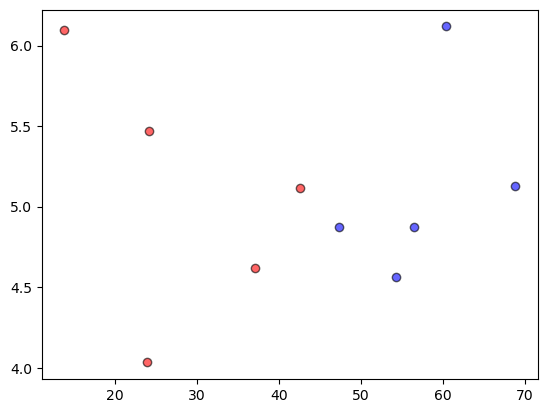

In [6]:
# 繪製兩個叢集的散點圖
plot_scatter(C1, color='b')
plot_scatter(C2, color='r')
plt.show()

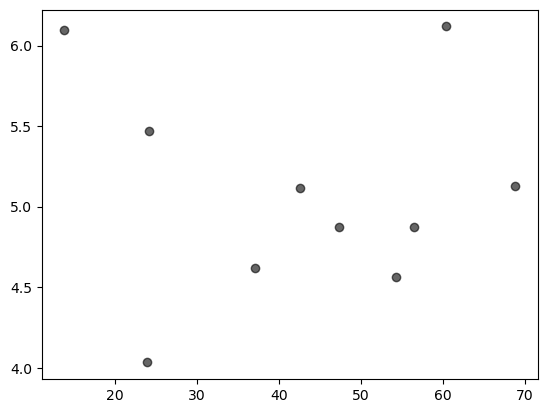

In [7]:
# 繪製訓練集的散點圖
plot_scatter(X_train)
plt.show()

In [8]:
# 計算訓練數據的均值和標準差
print('mean:', np.mean(X_train, axis=0))
print('std:', np.std(X_train, axis=0))

mean: [42.89357539  5.0887436 ]
std: [17.05783438  0.62726476]


# K-means algorithm

![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    

In [9]:
# 使用 KMeans 進行聚類分析
kmeans = KMeans(init='random', n_clusters=2).fit(X_train)
kmeans

KMeans(init='random', n_clusters=2)

`cluster_centers_`輸出2個cluster的中心位置，以判斷新的點分類較接近哪一群。

In [10]:
# 輸出叢集(cluster)中心
print("Cluster centers:\n", kmeans.cluster_centers_)

# 預測新的點的分類
print("Predicted cluster for [80, 0], [100, 3]:", kmeans.predict([[80, 0], [100, 3]]))
print("Predicted cluster for [28, 5]:", kmeans.predict([[28, 5]]))

Cluster centers:
 [[55.00421486  5.11133654]
 [24.72761619  5.05485418]]
Predicted cluster for [80, 0], [100, 3]: [0 0]
Predicted cluster for [28, 5]: [1]


In [11]:
# 預測訓練數據
kmeans.predict(X_train)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

`kmeans.predict(X_train)` 與 `kmeans.labels_` 是相同的，它們都代表模型對訓練資料的叢集(cluster)結果。

In [12]:
# 訓練集中每個數據的叢集
print(kmeans.labels_)

[0 0 0 0 0 1 1 1 1 0]


## Plot

Plot Scatter
1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色(cluster數非固定值)
2. 將K-means中心點資料點也繪製上去並有較大圖樣

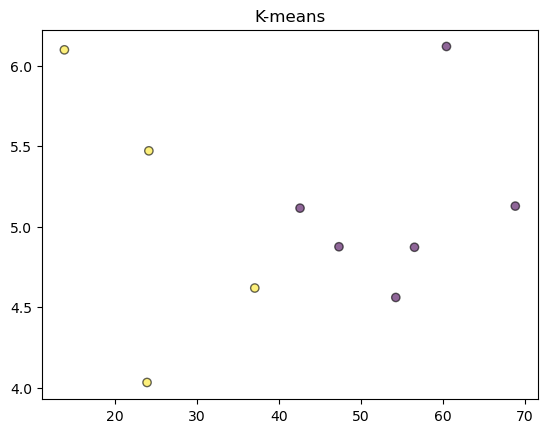

In [13]:
# 繪製k-means叢集結果的散點圖
plot_scatter(X_train, kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [14]:
# 輸出叢集(cluster)中心
print("Cluster centers:\n", kmeans.cluster_centers_)
# 輸出叢集中心的第二個坐標
print("Cluster centers' second coordinate (y-coordinate):\n", kmeans.cluster_centers_[:, 1])

Cluster centers:
 [[55.00421486  5.11133654]
 [24.72761619  5.05485418]]
Cluster centers' second coordinate (y-coordinate):
 [5.11133654 5.05485418]


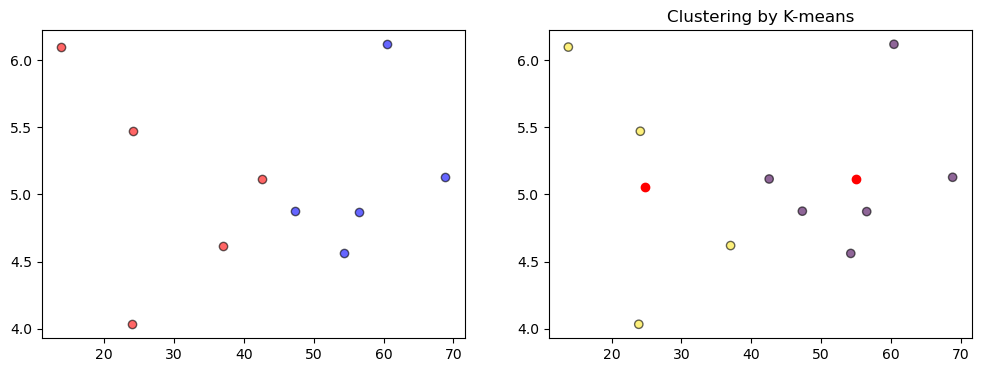

In [15]:
# 顯示原始叢集和k-means叢集結果
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')

plt.subplot(122)
plot_scatter(X_train,color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')
plt.title("Clustering by K-means")
plt.show()

# Agglomerative algorithm

1) linkage : {`ward`, `complete`, `average`, `single`}, optional (default=`ward`)

2) affinity : string or callable, default: `euclidean`
   Metric used to compute the linkage. Can be `euclidean`, `l1`, `l2`, `manhattan`, `cosine`, or `precomputed`.
   - If linkage is `ward`, only `euclidean` is accepted.
   - If `precomputed`, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.
   - AgglomerativeClustering可以透過affinity參數來指定距離度量方式，如euclidean、manhattan、cosine等。
   - default: “euclidean”.

In [16]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [17]:
n1=5
n2=5

# 生成第一個叢集(cluster1)
x1 = np.random.normal(60, 10, n1)  # np.random.normal(mu, sigma, size))
y1 = np.random.normal(5, 0.5, n1)
C1 = np.array(list(zip(x1, y1)))

# 生成第二個叢集(cluster2)
x2 = np.random.normal(30, 10, n2)
y2 = np.random.normal(5, 0.5, n2)
C2 = np.array(list(zip(x2, y2)))

# 合併兩個叢集成為訓練數據
X_train = np.concatenate((C1, C2))

# 計算兩個叢集的均值
print(np.mean(C1, axis=0))
print(np.mean(C2, axis=0))

[69.6482765  4.7215015]
[35.09195689  5.13002072]


In [18]:
X_train

array([[61.05069047,  5.19377901],
       [70.38711353,  4.20809224],
       [61.15699887,  4.83461326],
       [80.07235571,  4.32630103],
       [75.5742239 ,  5.04472194],
       [43.6638454 ,  5.81007896],
       [28.39402656,  3.88758156],
       [48.07405258,  5.44247463],
       [28.33584075,  5.48150581],
       [26.99201918,  5.02846266]])

In [19]:
# 使用 AgglomerativeClustering 進行聚類分析
acv = AgglomerativeClustering(n_clusters=2)
predicted_labels = acv.fit_predict(X_train)
predicted_labels

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

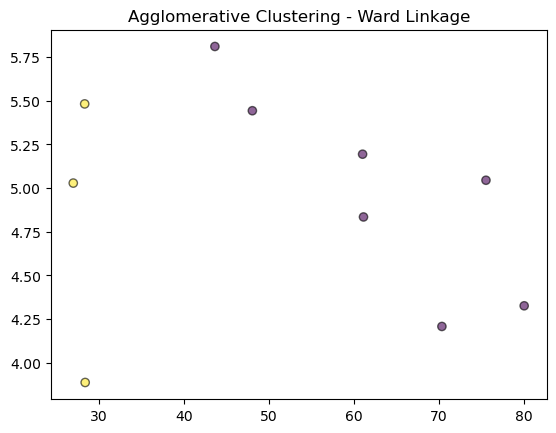

In [20]:
# 繪製Agglomerative Clustering結果的散點圖
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Agglomerative Clustering - Ward Linkage")
plt.show()

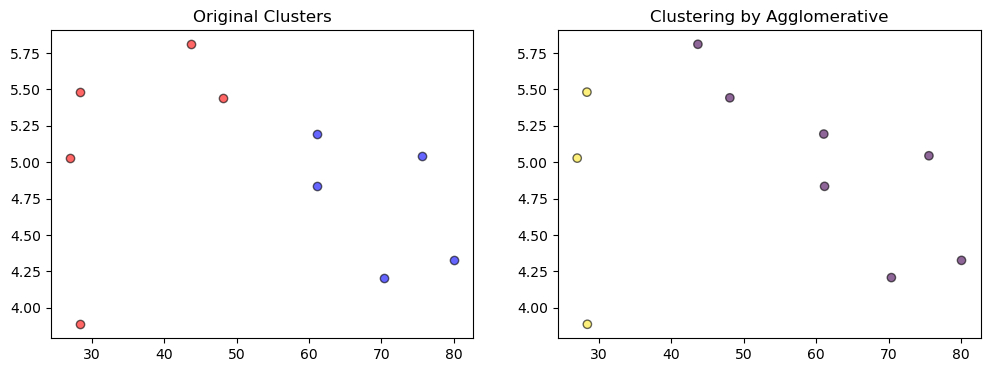

In [21]:
# 顯示原始叢集和Agglomerative Clustering結果
plt.figure(figsize=(12, 4))

# 原始叢集
plt.subplot(121)
plot_scatter(C1, color='b')
plot_scatter(C2, color='r')
plt.title("Original Clusters")

# Agglomerative Clustering結果
plt.subplot(122)
plot_scatter(X_train,color=acv.fit_predict(X_train))
plt.title("Clustering by Agglomerative")

plt.show()

# Distance Matrix

In [22]:
import numpy as np

n1=5
n2=5

# 生成第一個叢集(cluster1)
x1 = np.random.normal(60, 10, n1)  # np.random.normal(mu, sigma, size))
y1 = np.random.normal(5, 0.5, n1)
C1 = np.array(list(zip(x1, y1)))

# 生成第二個叢集(cluster2)
x2 = np.random.normal(30, 10, n2)
y2 = np.random.normal(5, 0.5, n2)
C2 = np.array(list(zip(x2, y2)))

# 合併兩個叢集成為訓練數據
X_train = np.concatenate((C1, C2))

# 計算兩個叢集的均值
print(np.mean(C1, axis=0))
print(np.mean(C2, axis=0))

[60.84514106  4.75297159]
[29.58977629  4.70275646]


In [23]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles,make_blobs

# 計算距離矩陣
D = np.round(pairwise_distances(X_train),1)
# 輸出整個距離矩陣
D

array([[ 0. , 17.9, 10.5,  5.5,  2.8, 47.1, 42.4, 43.5, 15.7, 44.2],
       [17.9,  0. ,  7.4, 12.4, 15.1, 29.2, 24.6, 25.6,  2.2, 26.3],
       [10.5,  7.4,  0. ,  5. ,  7.7, 36.6, 32. , 33. ,  5.2, 33.7],
       [ 5.5, 12.4,  5. ,  0. ,  2.7, 41.6, 37. , 38. , 10.2, 38.7],
       [ 2.8, 15.1,  7.7,  2.7,  0. , 44.3, 39.7, 40.7, 12.9, 41.4],
       [47.1, 29.2, 36.6, 41.6, 44.3,  0. ,  4.6,  3.6, 31.4,  2.9],
       [42.4, 24.6, 32. , 37. , 39.7,  4.6,  0. ,  1.1, 26.7,  1.7],
       [43.5, 25.6, 33. , 38. , 40.7,  3.6,  1.1,  0. , 27.8,  0.7],
       [15.7,  2.2,  5.2, 10.2, 12.9, 31.4, 26.7, 27.8,  0. , 28.5],
       [44.2, 26.3, 33.7, 38.7, 41.4,  2.9,  1.7,  0.7, 28.5,  0. ]])

In [24]:
# 距離矩陣的形狀
D.shape[0]

10

In [25]:
def min_dist(D):
    minimum = 10000  
    min_x = 0
    min_y = 0
    # 找到距離矩陣中的最小值
    for i in range(D.shape[0]):
        for j in range(i):           
            if D[i][j] < minimum:         
                minimum = D[i][j]
                min_x = i
                min_y = j
                # print(i,j,D[i][j])
    return (min_x, min_y), minimum
min_dist(D)

((9, 7), 0.7)

# plot dendrogram

In [26]:
import numpy as np

n1=5
n2=5

# 生成第一個叢集(cluster1)
x1 = np.random.normal(60, 10, n1)  # np.random.normal(mu, sigma, size))
y1 = np.random.normal(5, 0.5, n1)
C1 = np.array(list(zip(x1, y1)))

# 生成第二個叢集(cluster2)
x2 = np.random.normal(30, 10, n2)
y2 = np.random.normal(5, 0.5, n2)
C2 = np.array(list(zip(x2, y2)))

# 合併兩個叢集成為訓練數據
X_train = np.concatenate((C1, C2))

# 計算兩個叢集的均值
print(np.mean(C1, axis=0))
print(np.mean(C2, axis=0))

[58.7906184   4.52700994]
[31.33657141  5.06372816]


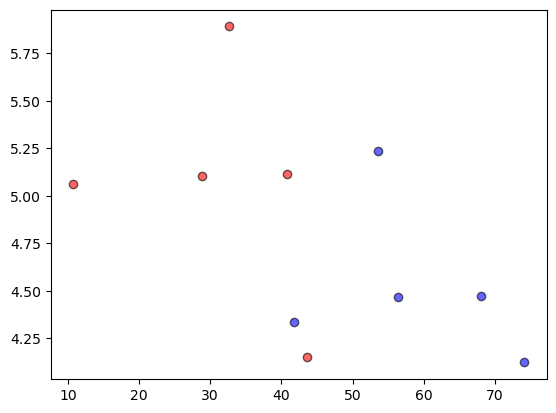

In [27]:
# 繪製兩個叢集的散點圖
plot_scatter(C1, color='b')
plot_scatter(C2, color='r')
plt.show()

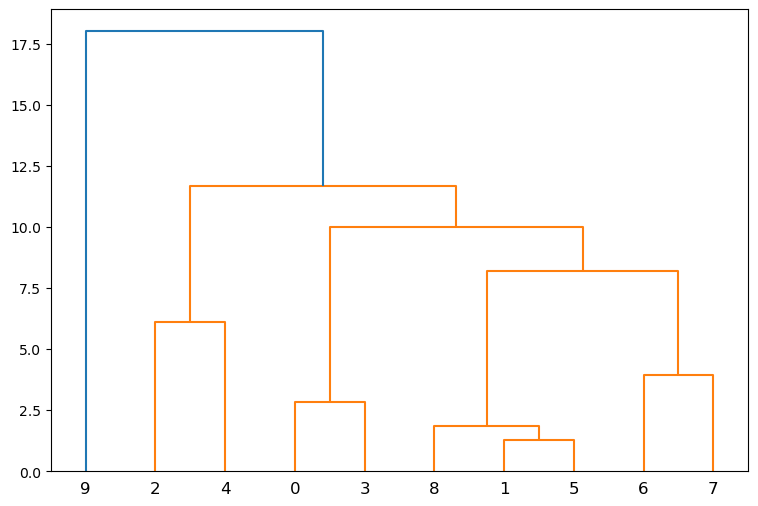

In [28]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show()

# Comparing different hierarchical linkage methods

連結方法（Linkage Methods）:
- Single Linkage: 選擇叢集間最短的距離。
- Complete Linkage: 選擇叢集間最長的距離。
- Average Linkage: 選擇叢集間平均距離。
- Ward Linkage: 選擇合併後叢集內變異數增量最小的那對群集。
    - Ward Linkage是其中一種比較常用的連結方法，因為它傾向於產生大小相對均勻的叢集。
    - AgglomerativeClustering預設使用的是ward連結方式。

In [29]:
import numpy as np

n1=5
n2=5

# 生成第一個叢集(cluster1)
x1 = np.random.normal(60, 10, n1)  # np.random.normal(mu, sigma, size))
y1 = np.random.normal(5, 0.5, n1)
C1 = np.array(list(zip(x1, y1)))

# 生成第二個叢集(cluster2)
x2 = np.random.normal(30, 10, n2)
y2 = np.random.normal(5, 0.5, n2)
C2 = np.array(list(zip(x2, y2)))

# 合併兩個叢集成為訓練數據
X_train = np.concatenate((C1, C2))

# 計算兩個叢集的均值
print(np.mean(C1, axis=0))
print(np.mean(C2, axis=0))

[66.01193779  4.81281713]
[29.21483581  5.08274098]


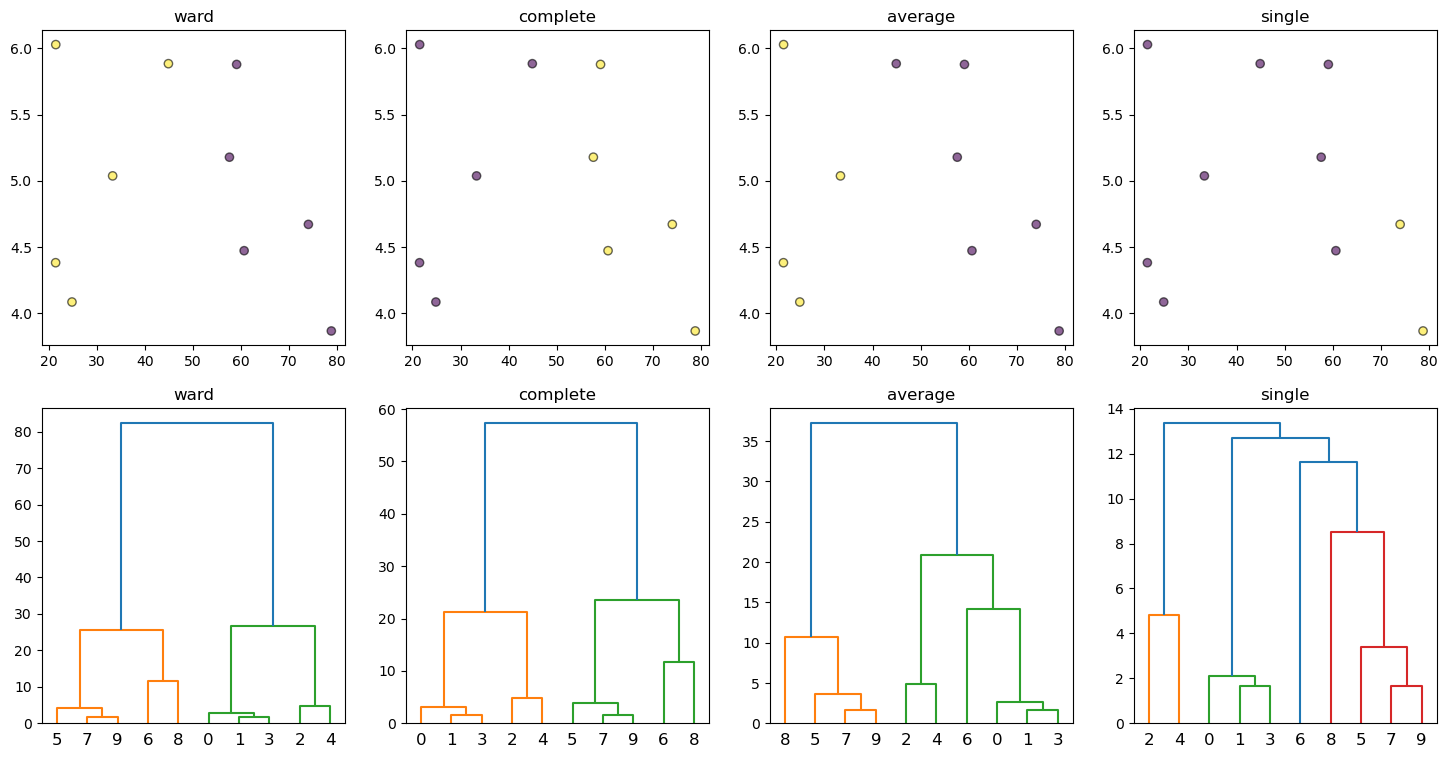

In [30]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_scatter(X,  color='k', alpha=0.6):
    # if use color index , the index must be between 0 and 1
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i, link in enumerate(linktype):
        model = AgglomerativeClustering(n_clusters=2, linkage=link).fit(X)
        cluster_labels=model.fit_predict(X)
        # plot scatter
        plt.subplot(2,4,i+1)
        plot_scatter(X, cluster_labels)
        plt.title(link)
        # plot dendrogram
        plt.subplot(2,4,i+5)
        plot_dendrogram(X,link)
        plt.title(link)

    plt.show()

compare_linkage(X_train)

# Apply K-means with re-scaled data 

## random.normal

In [31]:
import numpy as np

n1=5
n2=5

# 生成第一個叢集(cluster1)
x1 = np.random.normal(60, 10, n1)  # np.random.normal(mu, sigma, size))
y1 = np.random.normal(5, 0.5, n1)
C1 = np.array(list(zip(x1, y1)))

# 生成第二個叢集(cluster2)
x2 = np.random.normal(30, 10, n2)
y2 = np.random.normal(5, 0.5, n2)
C2 = np.array(list(zip(x2, y2)))

# 合併兩個叢集成為訓練數據
X_train = np.concatenate((C1, C2))

# 計算兩個叢集的均值
print(np.mean(C1, axis=0))
print(np.mean(C2, axis=0))

[61.41484501  5.10225702]
[28.38421875  4.79414565]


In [32]:
X_train

array([[63.96171998,  5.25601932],
       [74.35340012,  5.66139713],
       [65.42123123,  4.11332158],
       [55.34477268,  5.04569594],
       [47.99310102,  5.43485112],
       [41.25162837,  4.55242554],
       [36.80516313,  4.37060851],
       [14.94610087,  5.31878806],
       [34.42116884,  4.63955144],
       [14.49703251,  5.0893547 ]])

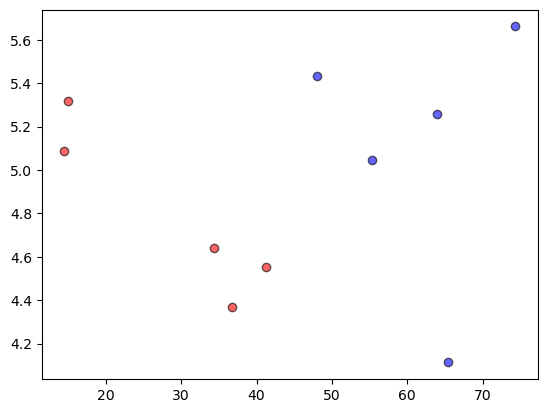

In [33]:
import matplotlib.pyplot as plt

def plot_scatter(X,  color='k', alpha=0.6):
    # if use color index , the index must be between 0 and 1
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')

# 繪製兩個叢集的散點圖
plot_scatter(C1, color='b')
plot_scatter(C2, color='r')
plt.show()

Feature Re-scale

標準化的效果
- 特徵平均值為零: 標準化後，所有特徵的平均值將變為零。這樣可以消除特徵在數值尺度上的偏差。
- 特徵方差為一: 所有特徵的變異數將變為一。這樣不同特徵之間可以進行更公平的比較，尤其是在基於距離的演算法中。
- 提高模型效能: 對於一些機器學習演算法，如支援向量機、k-均值聚類、PCA等，標準化後的資料有助於演算法更快收斂，並提升模型的效能。

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  # Compute the statistics to be used for later scaling.
print(sc.mean_)  # mean
print(sc.scale_) # standard deviation

[44.89953188  4.94820133]
[19.44441522  0.47849066]


In [35]:
# transform: (x-u)/std.
X_train_std = sc.transform(X_train)
print(np.round(np.mean(X_train_std, axis=0), 2))

[-0.  0.]


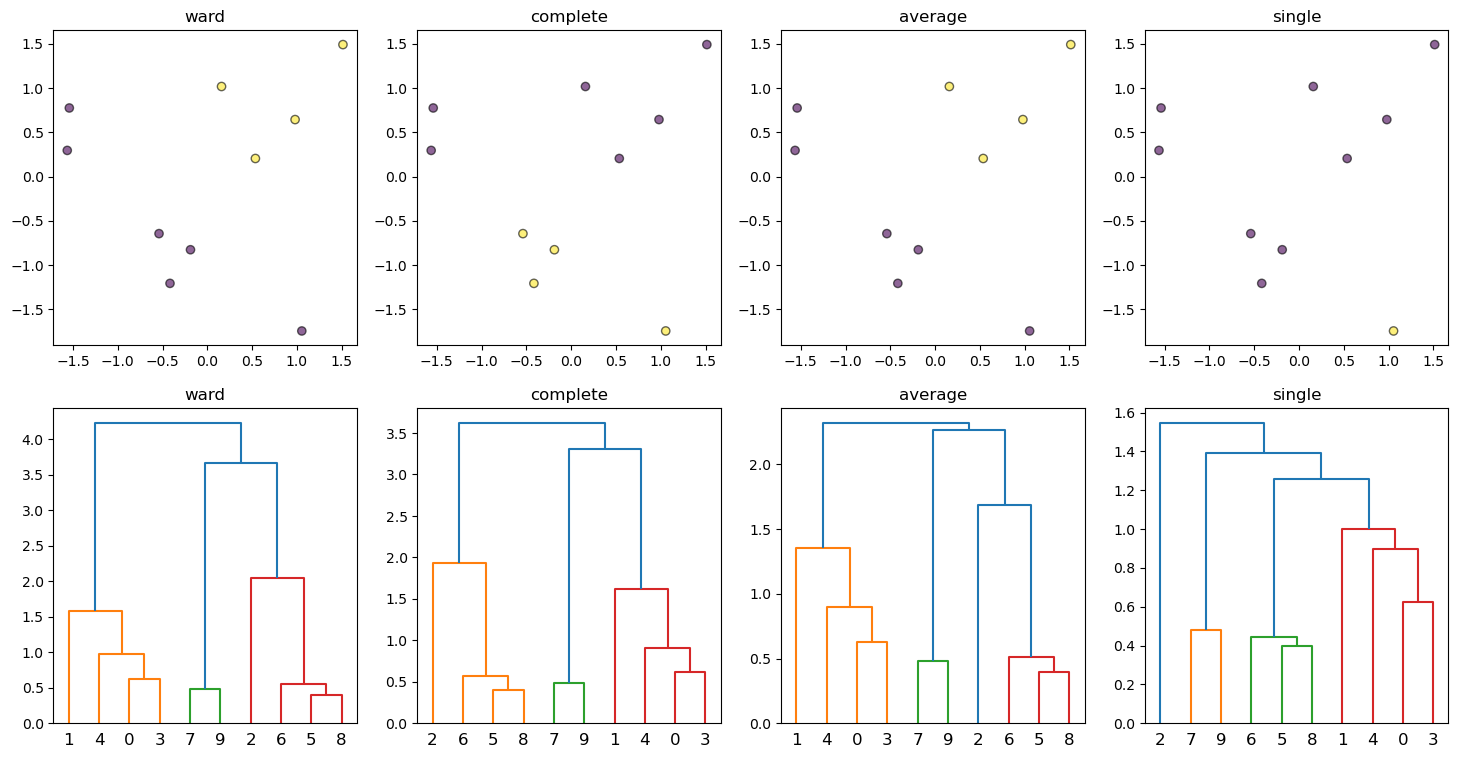

In [36]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i,link in enumerate(linktype):
        model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X)
        cluster_labels=model.fit_predict(X)
        # plot scatter
        plt.subplot(2,4,i+1)
        plot_scatter(X, cluster_labels)
        plt.title(link)
        # plot dendrogram
        plt.subplot(2,4,i+5)
        plot_dendrogram(X,link)
        plt.title(link)

    plt.show()

compare_linkage(X_train_std)

## make_circles

In [37]:
from sklearn.datasets import make_circles

# make a synthetic dataset (circle)
# array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 

In [38]:
print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


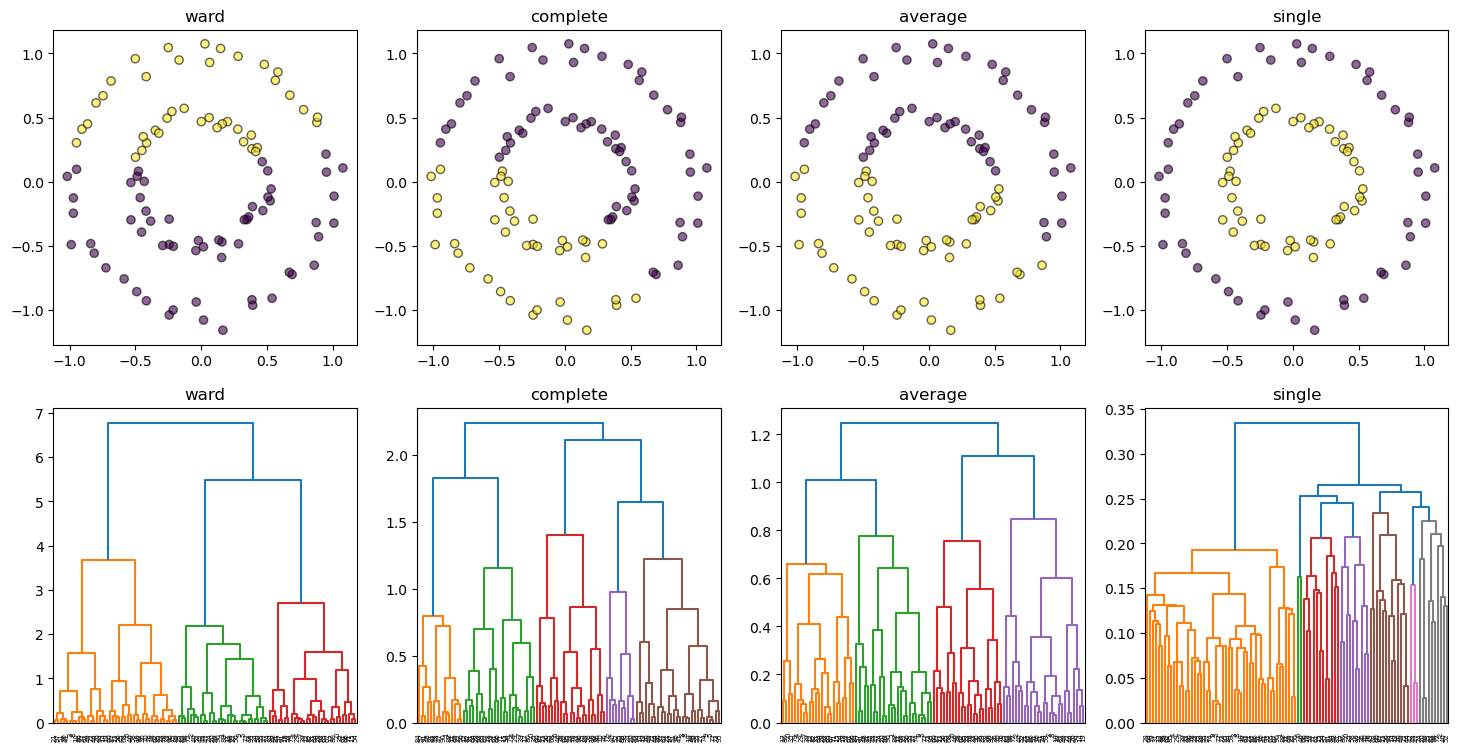

In [39]:
compare_linkage(X)